# L1 regularization

Goals:
- hand-code the polynomial regression algorithm with L1 regularization on a toy dataset
- study the effect of L1 regularization on the convergence

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
import math

N = 100
D = 2

# dataset is no longer idillic shape modelled by the second degree polynomial
# we want to see how the polynomial regression will manage to adapt to a non-polinomial shape
# it is expected to have a high bias
# but we want to prefer the model that generalizes best
# so we are going to use x2 = sin(x1 * freq) * amp
freq = 3
amp = 0.7

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 0.3

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = np.linspace(-2.0, 3.0, N)
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = np.sin(data[:, 0] * freq) * amp + data[:, 1]

np.random.shuffle(data)

# peek into the dataset
data[:5]

array([[-1.8989899 ,  1.02008245],
       [ 1.33333333, -0.37620502],
       [ 1.73737374,  0.024342  ],
       [ 0.87878788,  0.79470631],
       [ 1.23232323, -0.73841521]])

## Plot the toy dataset

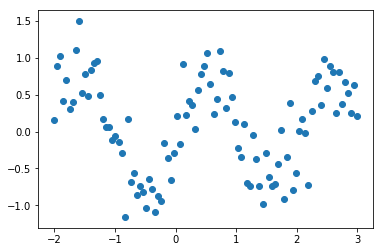

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Model the relationship

In [4]:
# We are going to model the data using third degree polynomial
# x2 = w1 * x1 + w2 * x1*x1 + w3 * x1*x1*x1 + b

# initial values for w and b
w1 = 1.0
w2 = 1.0
w3 = 2.5
b = 0.0

# predicts target values according to the model
def predict(X):
    return X*w1 + X*X*w2 + X*X*X*w3 + b

### Untrained regression

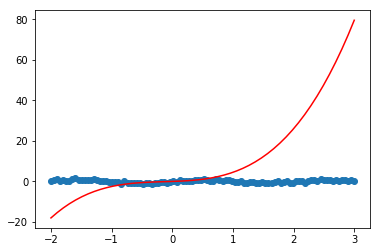

In [5]:
x = np.linspace(-2.0, 3.0)
Y = predict(x)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, Y, color='red')

## Train the model

### Split into training set and validation set

In [6]:
X_train = data[:-30, 0]
T_train = data[:-30, 1]

X_test = data[-30:, 0]
T_test = data[-30:, 1]

### Plot the train and test data

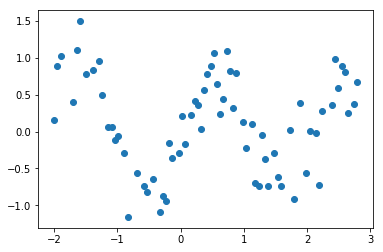

In [7]:
plt.scatter(X_train, T_train)

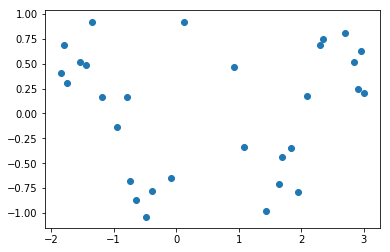

In [8]:
plt.scatter(X_test, T_test)

### Loss function

In [9]:
# Mean squared error
def mean_squared_error(T, Y):
    return np.square(Y - T).mean()

### Gradient descent - no regularization

In [10]:
# initial parameters
w1 = 1.0
w2 = 1.0
w3 = 1.0
b = 0.0

# training rate
alpha = 0.001

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train).mean()
    grad_w3 = ((Y_train - T_train) * X_train*X_train*X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    w3 = w3 - alpha * grad_w3
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 112.53305942578913
error: 0.7550094653845085
error: 0.6580028182966201
error: 0.6033031850793873
error: 0.5691362906025919
error: 0.545506829607328
error: 0.5275400420911491
error: 0.5128345202553157
error: 0.5001858189794589
error: 0.48897079984586217
final error: 0.48248201257105255
iterations: 963


### Validate the model

In [11]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

0.6227776365215498

### Plot the prediction line

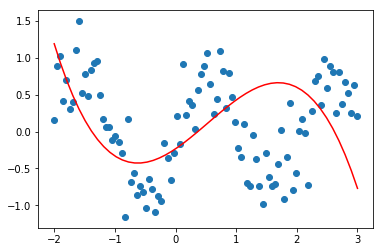

In [12]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict(x), color='red')

### Learned parameters

In [13]:
[w1, w2, w3, b]

[0.554254396584253,
 0.2819643128810414,
 -0.17539696906200092,
 -0.23425736843230072]

### Gradient descent - L1 regularization

In [14]:
# initial parameters
w1 = 1.0
w2 = 1.0
w3 = 1.0
b = 0.0

# training rate
alpha = 0.001

# regularisation parameter
gamma = 0.2

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train + gamma * np.sign(w1)).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train + gamma * np.sign(w2)).mean()
    grad_w3 = ((Y_train - T_train) * X_train*X_train*X_train + gamma * np.sign(w3)).mean()
    grad_b = (Y_train - T_train + gamma * np.sign(b)).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    w3 = w3 - alpha * grad_w3
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 112.53305942578913
error: 0.7334680660984407
error: 0.6219576379106985
error: 0.56071785591389
error: 0.5228722738624051
error: 0.4966873051048916
error: 0.4766682826854378
error: 0.46025621790326404
error: 0.4462600287825903
error: 0.43411673900869796
final error: 0.42453716072494835
iterations: 990


### Validate the model

In [15]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

0.48545218917232064

### Plot the prediction line

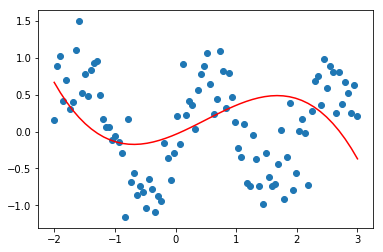

In [16]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict(x), color='red')

### Learned parameters

In [17]:
[w1, w2, w3, b]

[0.3461754943201358,
 0.1487630090731654,
 -0.10028744167985643,
 -0.03957474563876437]

## Conclusions

- Without regularization, the model is desperately trying to bend to fit the shape it clearly cannot model well
- With L1 regularization, the model is "giving up" and bends only slightly. As a result it generalizes better and outperforms the model without regularization